In [ ]:
# -- Installs -- 
!pip3 install -U ucimlrepo 
!pip3 install scikit-learn

# -- Imports --
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [68]:
# -- Setup -- 

# Fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967) 

# Get the data as pandas data frames
# The structure of the object is like a dictionary wrapper (dot dict)
# .data: Contains the actual dataset tables.
# .metadata: Contains descriptive information (like the dataset name, author, and purpose).
# .variables: Contains a DataFrame describing each column (feature, target, data type).

X = phiusiil_phishing_url_website.data.features 
y = phiusiil_phishing_url_website.data.targets 

In [69]:
# -- Data Processing --

X = X.drop(labels=['URL', 'Domain', 'TLD', 'Title'], axis=1) # Drop text data as scikit-learn does not support categorical data w/ decision trees
X = X.drop(labels=['URLSimilarityIndex'], axis=1) # Remove the similarity index, as it is a shortcut feature

In [70]:
# -- Split Data -- 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
# -- Fit the training data --
clf = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X_train, y_train)

In [72]:
# -- Predicted y value --
y_pred = clf.predict(X_test)

In [73]:
# -- Evaluation --
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'accuracy_score: {accuracy}\n')

report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

accuracy_score: 0.9895672825456961

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30151
           1       0.99      0.99      0.99     40588

    accuracy                           0.99     70739
   macro avg       0.99      0.99      0.99     70739
weighted avg       0.99      0.99      0.99     70739



In [ ]:
# -- Find importance of features --
for name, score in zip(X.columns, clf.feature_importances_):
    print(f"{name}: {score:.3f}")

URLLength: 0.000
DomainLength: 0.000
IsDomainIP: 0.000
CharContinuationRate: 0.000
TLDLegitimateProb: 0.000
URLCharProb: 0.000
TLDLength: 0.000
NoOfSubDomain: 0.005
HasObfuscation: 0.000
NoOfObfuscatedChar: 0.000
ObfuscationRatio: 0.000
NoOfLettersInURL: 0.000
LetterRatioInURL: 0.000
NoOfDegitsInURL: 0.000
DegitRatioInURL: 0.000
NoOfEqualsInURL: 0.000
NoOfQMarkInURL: 0.000
NoOfAmpersandInURL: 0.000
NoOfOtherSpecialCharsInURL: 0.022
SpacialCharRatioInURL: 0.000
IsHTTPS: 0.012
LineOfCode: 0.000
LargestLineLength: 0.000
HasTitle: 0.000
DomainTitleMatchScore: 0.000
URLTitleMatchScore: 0.000
HasFavicon: 0.000
Robots: 0.000
IsResponsive: 0.000
NoOfURLRedirect: 0.000
NoOfSelfRedirect: 0.000
HasDescription: 0.000
NoOfPopup: 0.000
NoOfiFrame: 0.000
HasExternalFormSubmit: 0.000
HasSocialNet: 0.008
HasSubmitButton: 0.000
HasHiddenFields: 0.000
HasPasswordField: 0.000
Bank: 0.000
Pay: 0.000
Crypto: 0.000
HasCopyrightInfo: 0.000
NoOfImage: 0.000
NoOfCSS: 0.000
NoOfJS: 0.000
NoOfSelfRef: 0.064
NoOfE

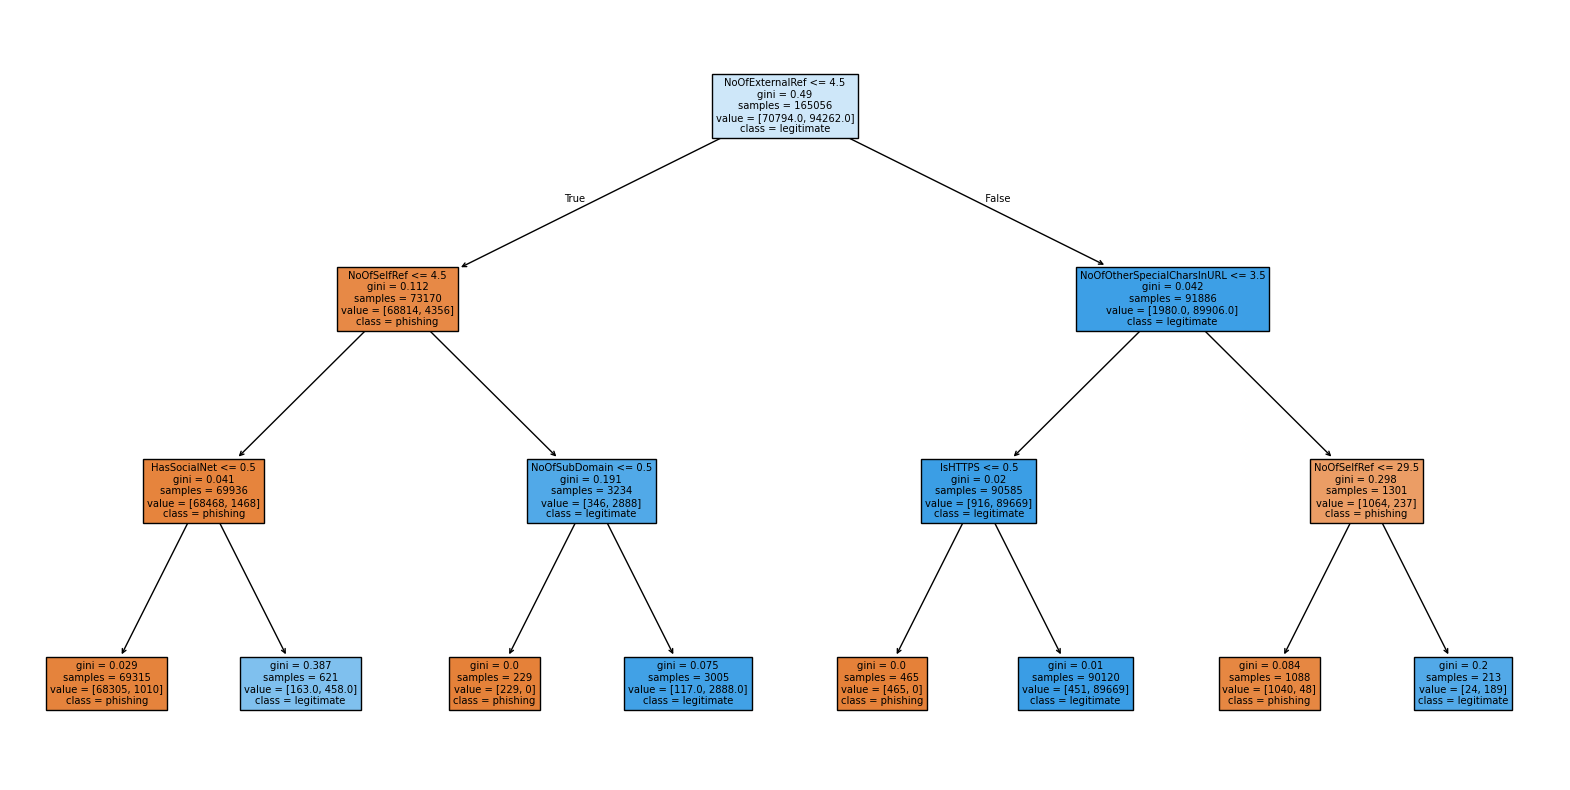

In [74]:
# -- Plot -- 
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X_train.columns, class_names=['phishing', 'legitimate'], filled=True)
plt.show()

## Intro

The decision tree above visualises how the model classifies URLs as phishing / fake or legimitate. 

The dataset is a **PhiUSIIL** phishing URL created from 235,795 legitimate and phishing URLs.

PhiUSILL extracts URL features, HTML features, and derives new features from exisitng information to create a phishing URL dataset, which is used above. 


## Preparation 

I have removed the cateogrical features, like URL, as they were not needed for the decision tree, and were incompatible anyways. 

I have also removed `URLSimilarityIndex` as it was a shortcut feature, and resulted in perfect evaluation scores as it gives away the label. 


## Scores

After removing the shortcut feature, I got:

- 0.99 accuracy
- 0.99 precision and recall for both labels
  
## Importance 
Upon examining the decision tree, and the importance of features, `NoOfExternalRef` accounted for 89% of the importance. A few other features, like `NoOfSelfRef` and `NoOfOtherSpecialCharsInURL` also contributed some amounts. Most features had zero importance. 

This could indicate that the `NoOfExternalRef` feautre acts a strong shortcut feature, possibly due to how the dataset was constructuted. 

## Results
The model found that phishing sites tend to have fewer external references than legitimate sites, as shown by the most important split in our decision tree. This highlights how feature patterns can vary between different threat datasets.

While the model achieves high accuracy, recall, and precision, this performance may be influenced by how the dataset was constructed and the particular features used. Real world phishing attempts could have different characteristics, so the effectiveness of this approach should be validated on additional datasets



## Acknowledgements

Prasad, A., & Chandra, S. (2023). PhiUSIIL: A diverse security profile empowered phishing URL detection framework based on similarity index and incremental learning. Computers & Security, 103545. doi: https://doi.org/10.1016/j.cose.2023.103545
